<a href="https://colab.research.google.com/github/aayushi-0407/ML-Projects/blob/main/Lung_cancer.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

#import statements


In [ ]:
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
import seaborn as sns
from sklearn import svm
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report

In [ ]:
data=pd.read_csv("/content/cancer patient data sets.csv")
data

,index,Patient Id,Age,Gender,Air Pollution,Alcohol use,Dust Allergy,OccuPational Hazards,Genetic Risk,chronic Lung Disease,...,Fatigue,Weight Loss,Shortness of Breath,Wheezing,Swallowing Difficulty,Clubbing of Finger Nails,Frequent Cold,Dry Cough,Snoring,Level
0,0,P1,33,1,2,4,5,4,3,2,...,3,4,2,2,3,1,2,3,4,Low
1,1,P10,17,1,3,1,5,3,4,2,...,1,3,7,8,6,2,1,7,2,Medium
2,2,P100,35,1,4,5,6,5,5,4,...,8,7,9,2,1,4,6,7,2,High
3,3,P1000,37,1,7,7,7,7,6,7,...,4,2,3,1,4,5,6,7,5,High
4,4,P101,46,1,6,8,7,7,7,6,...,3,2,4,1,4,2,4,2,3,High
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
995,995,P995,44,1,6,7,7,7,7,6,...,5,3,2,7,8,2,4,5,3,High
996,996,P996,37,2,6,8,7,7,7,6,...,9,6,5,7,2,4,3,1,4,High
997,997,P997,25,2,4,5,6,5,5,4,...,8,7,9,2,1,4,6,7,2,High
998,998,P998,18,2,6,8,7,7,7,6,...,3,2,4,1,4,2,4,2,3,High


In [ ]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1000 entries, 0 to 999
Data columns (total 26 columns):
 #   Column                    Non-Null Count  Dtype 
---  ------                    --------------  ----- 
 0   index                     1000 non-null   int64 
 1   Patient Id                1000 non-null   object
 2   Age                       1000 non-null   int64 
 3   Gender                    1000 non-null   int64 
 4   Air Pollution             1000 non-null   int64 
 5   Alcohol use               1000 non-null   int64 
 6   Dust Allergy              1000 non-null   int64 
 7   OccuPational Hazards      1000 non-null   int64 
 8   Genetic Risk              1000 non-null   int64 
 9   chronic Lung Disease      1000 non-null   int64 
 10  Balanced Diet             1000 non-null   int64 
 11  Obesity                   1000 non-null   int64 
 12  Smoking                   1000 non-null   int64 
 13  Passive Smoker            1000 non-null   int64 
 14  Chest Pain               

In [ ]:
numeric_col=data.describe().columns

#No outliers because we have a categorical data

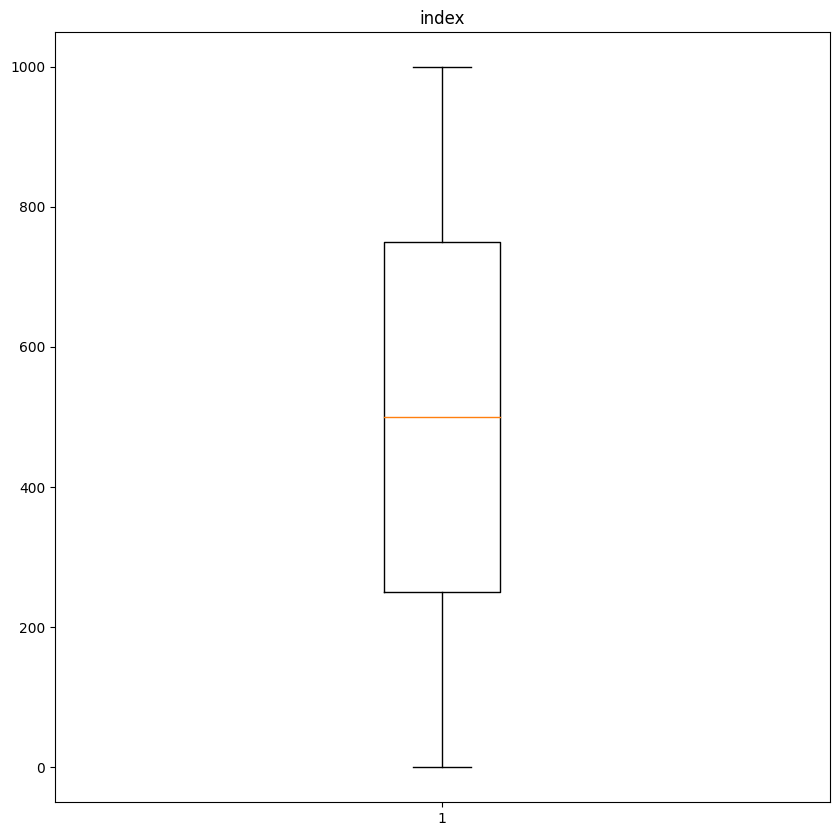

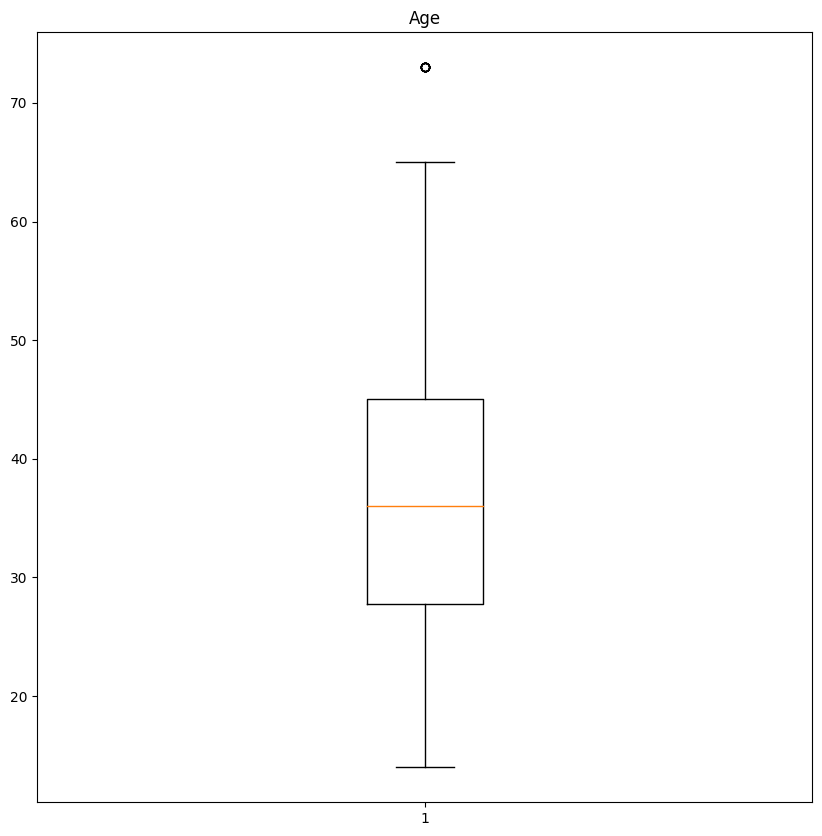

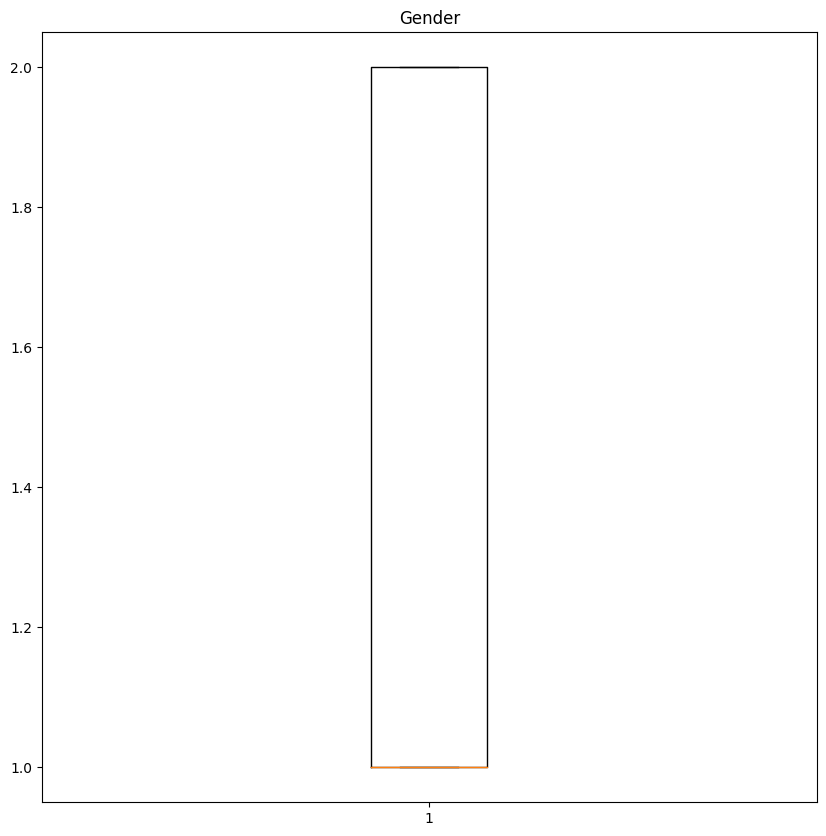

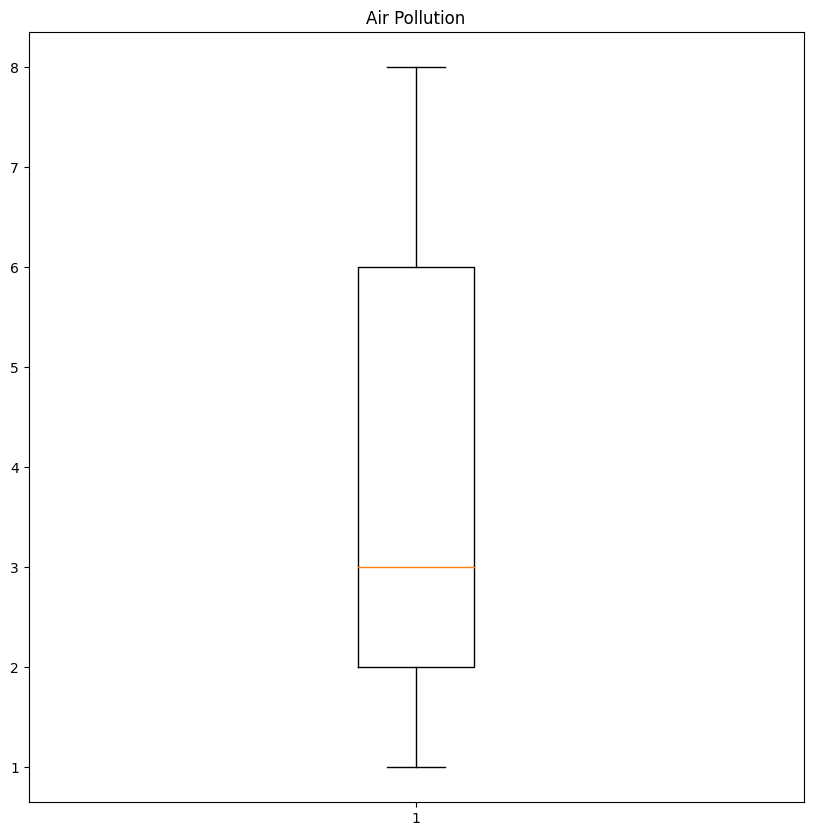

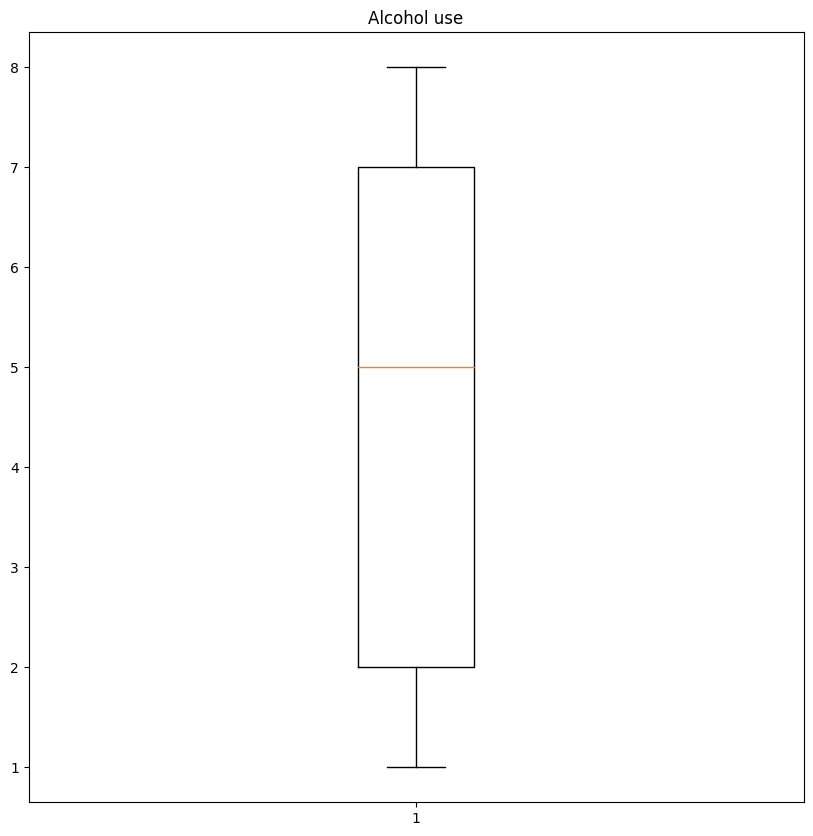

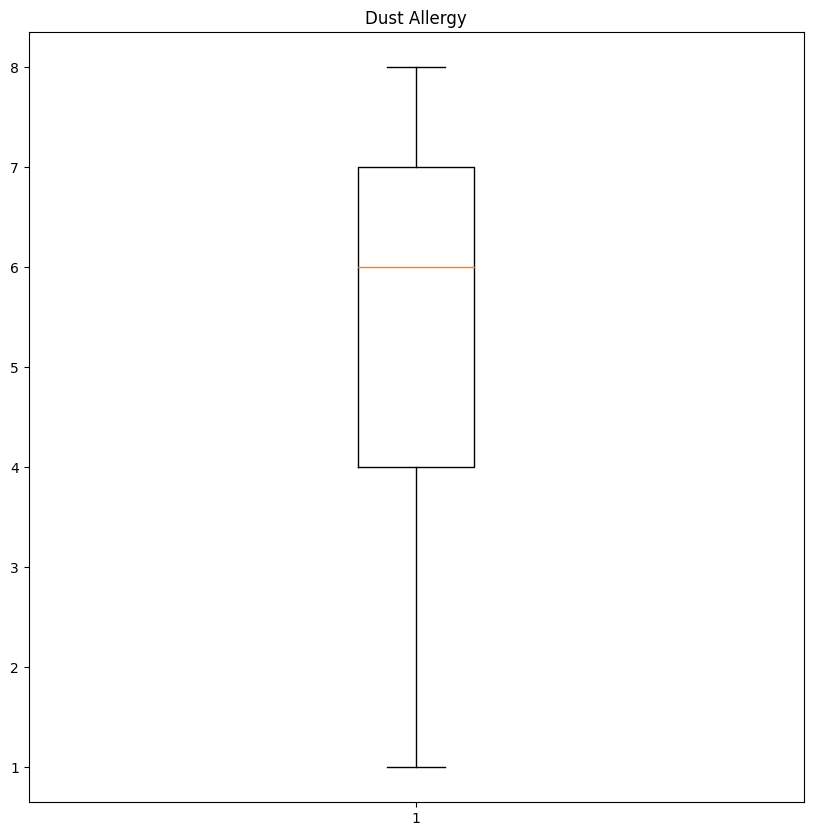

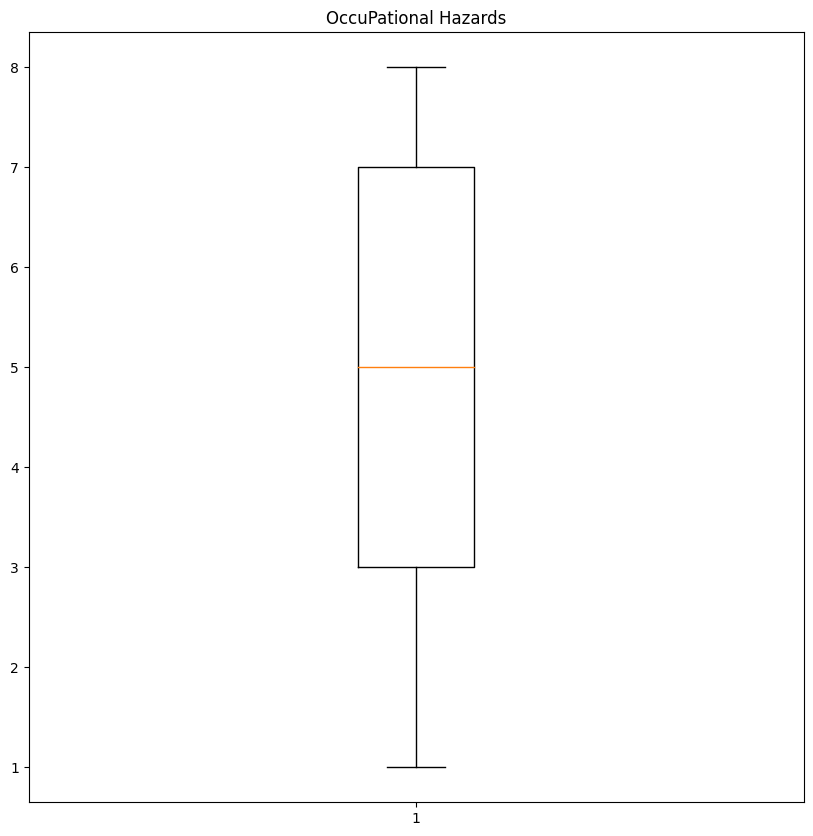

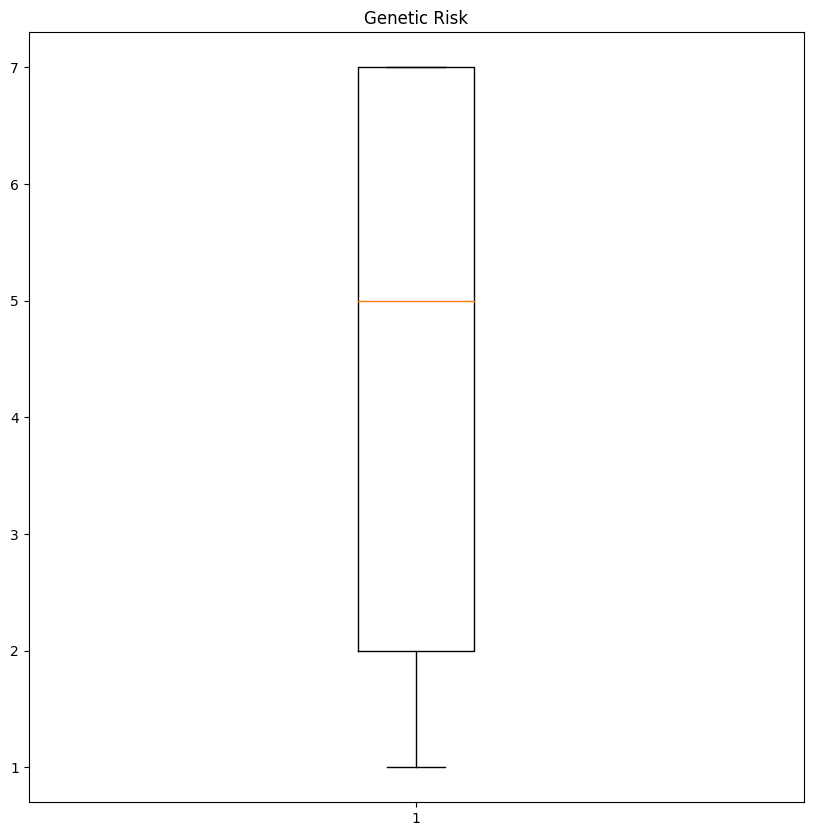

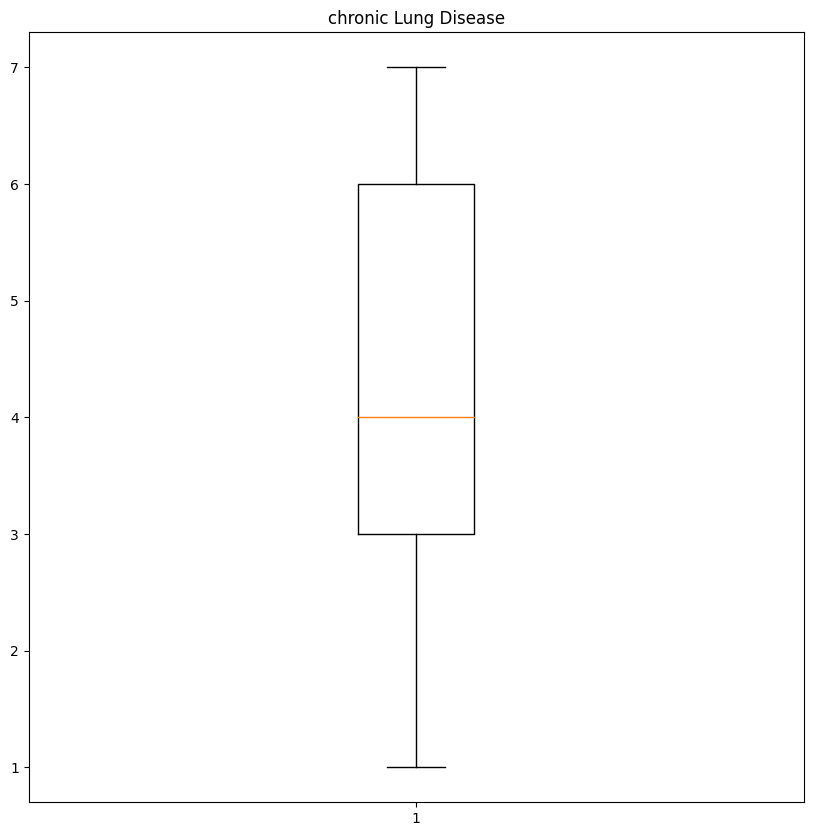

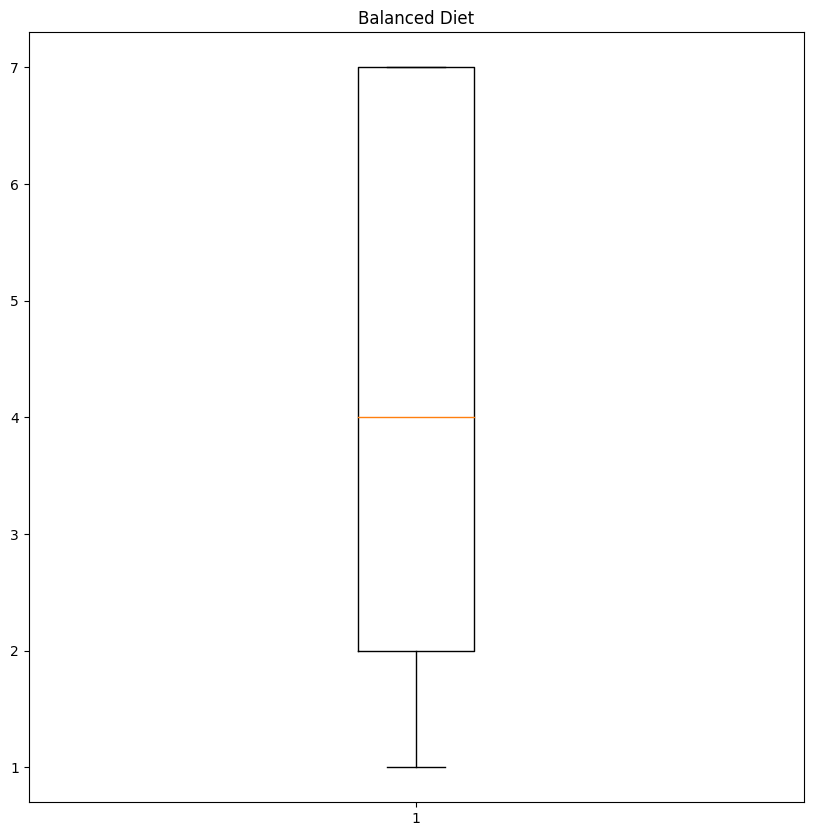

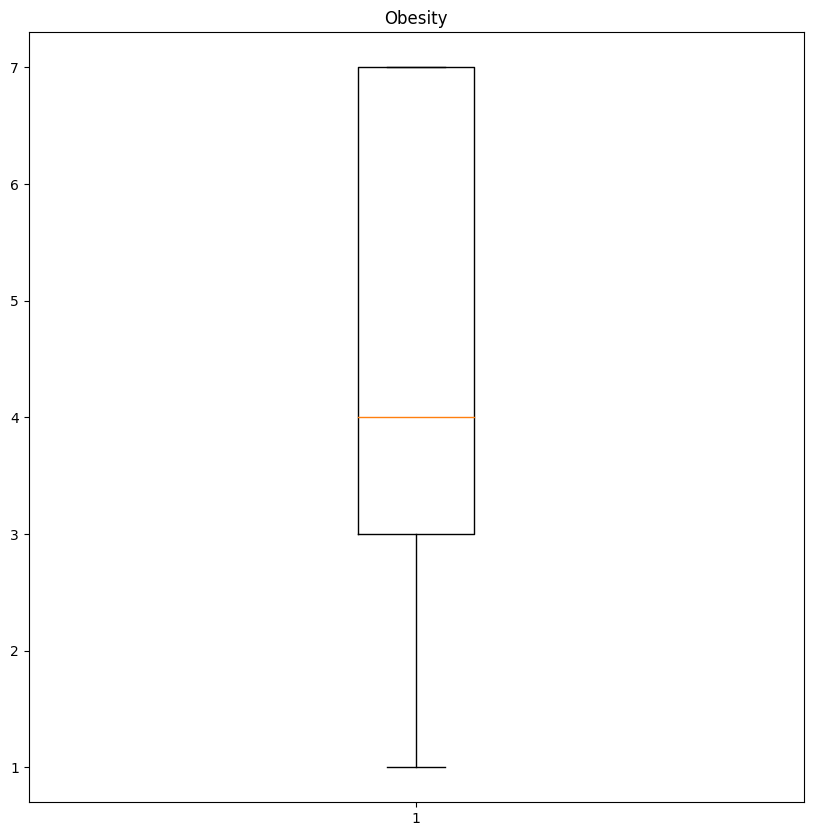

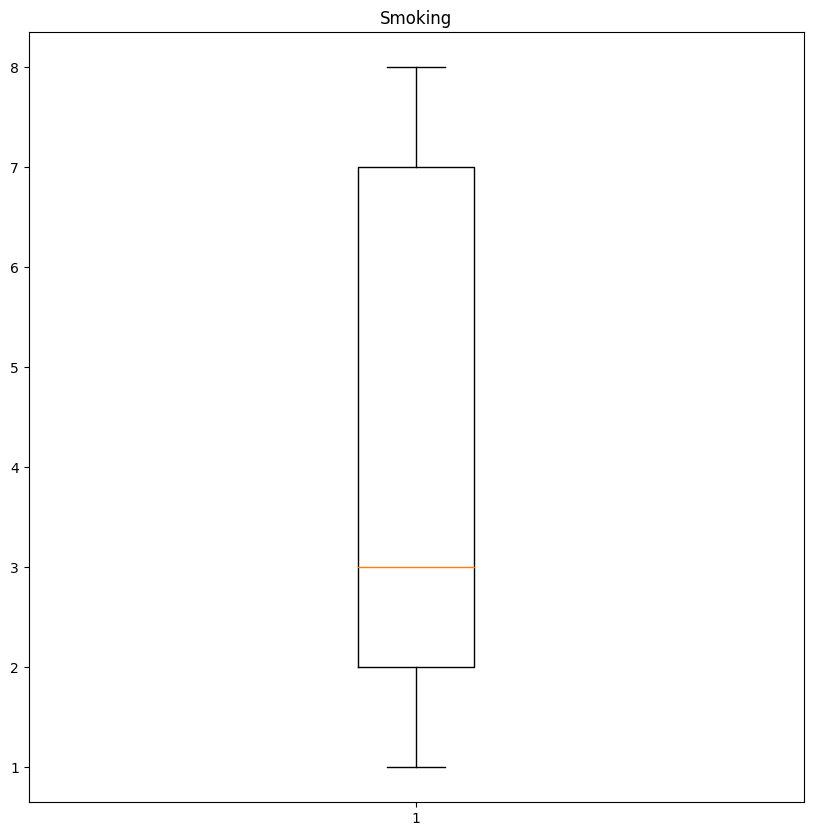

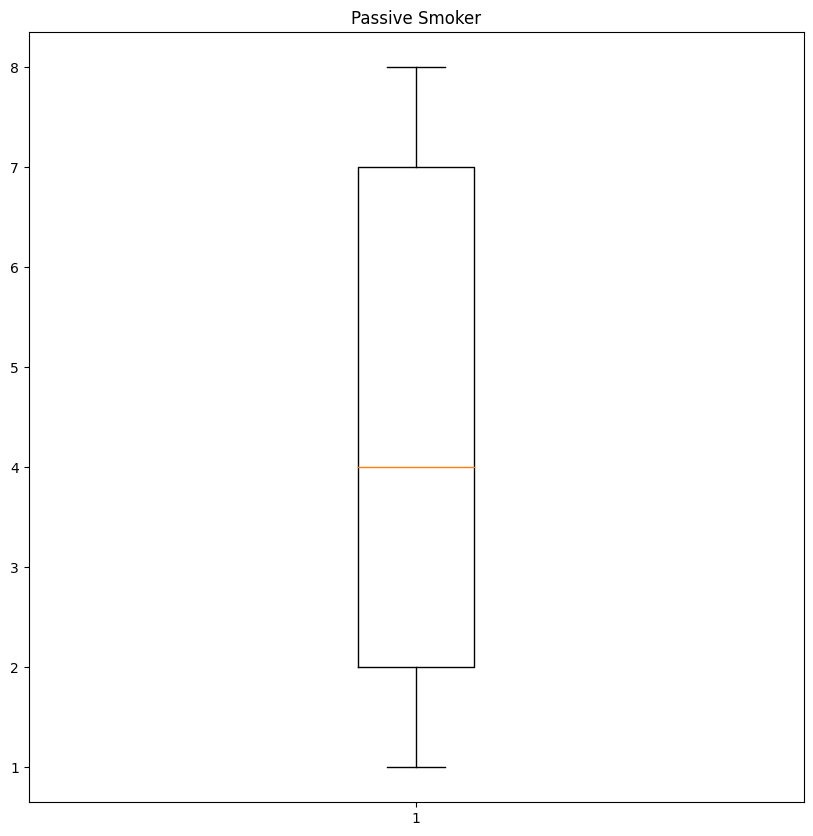

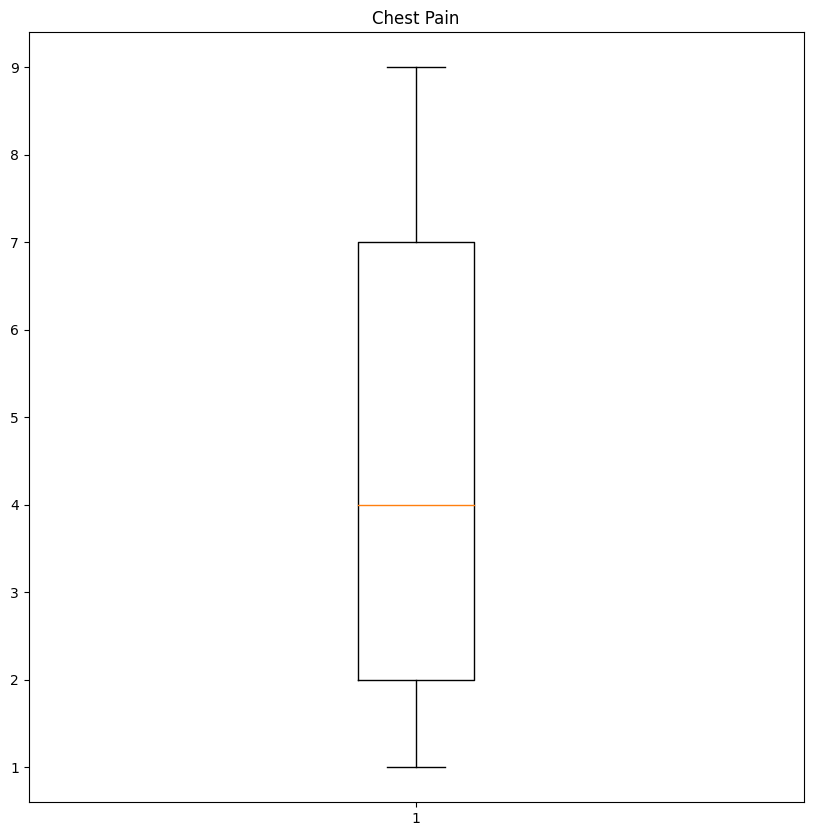

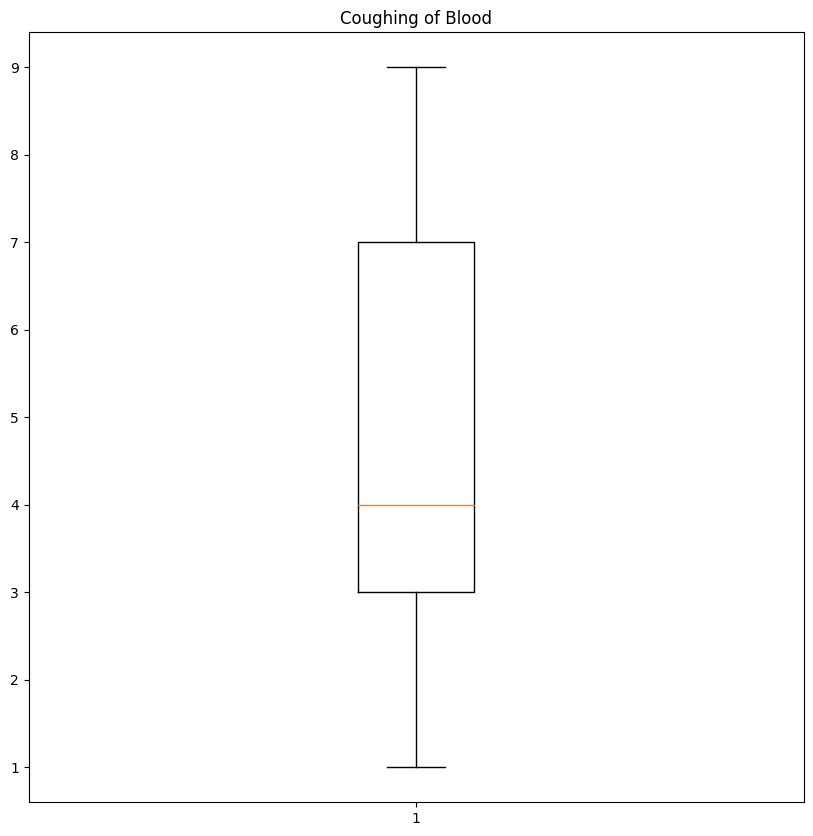

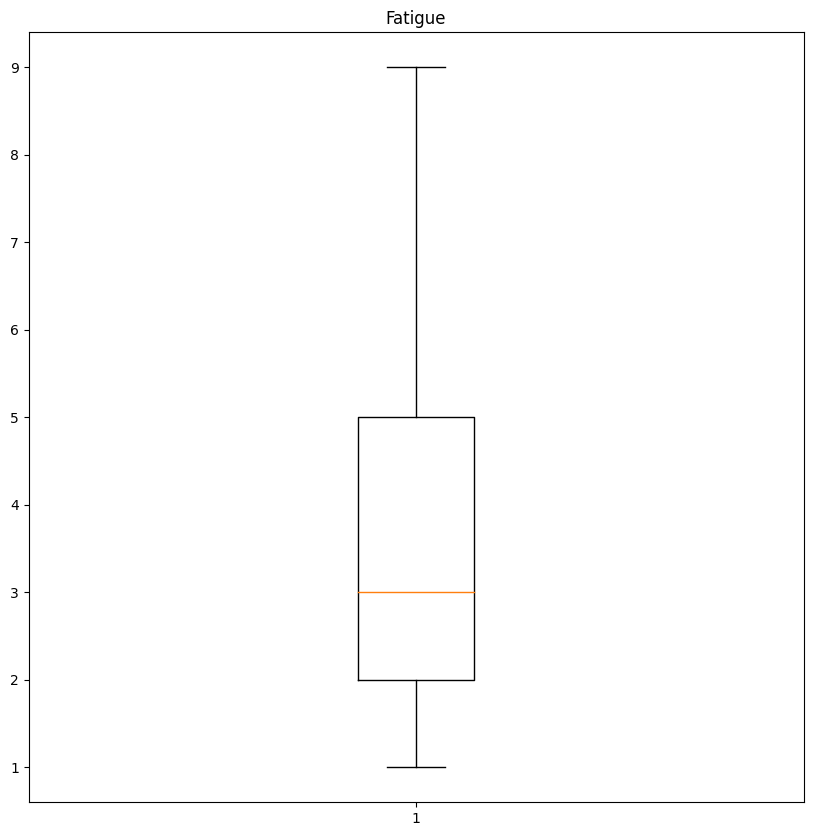

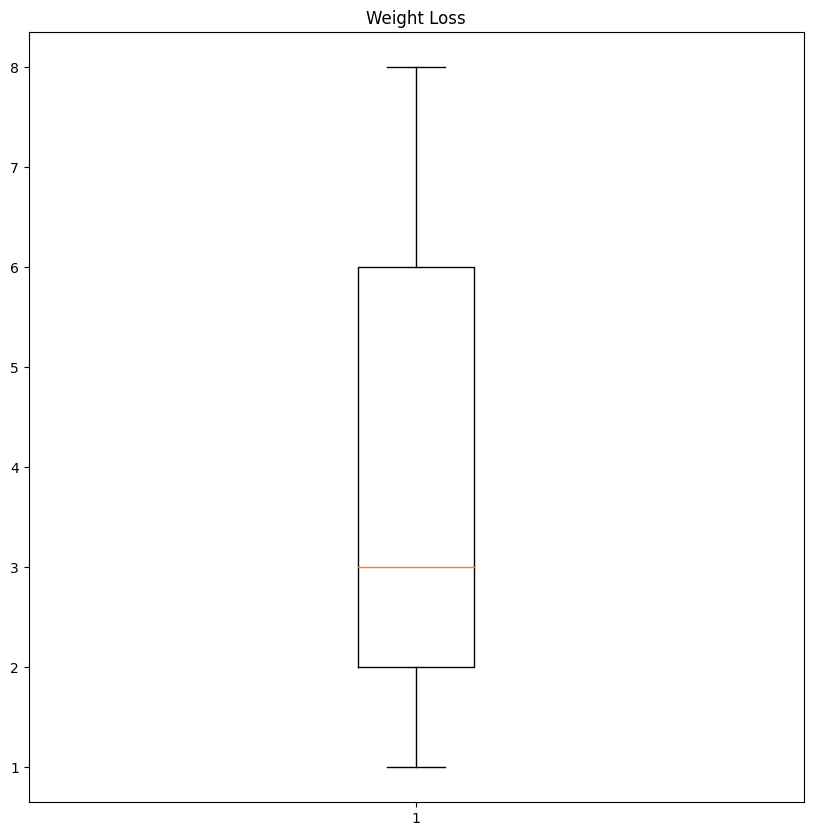

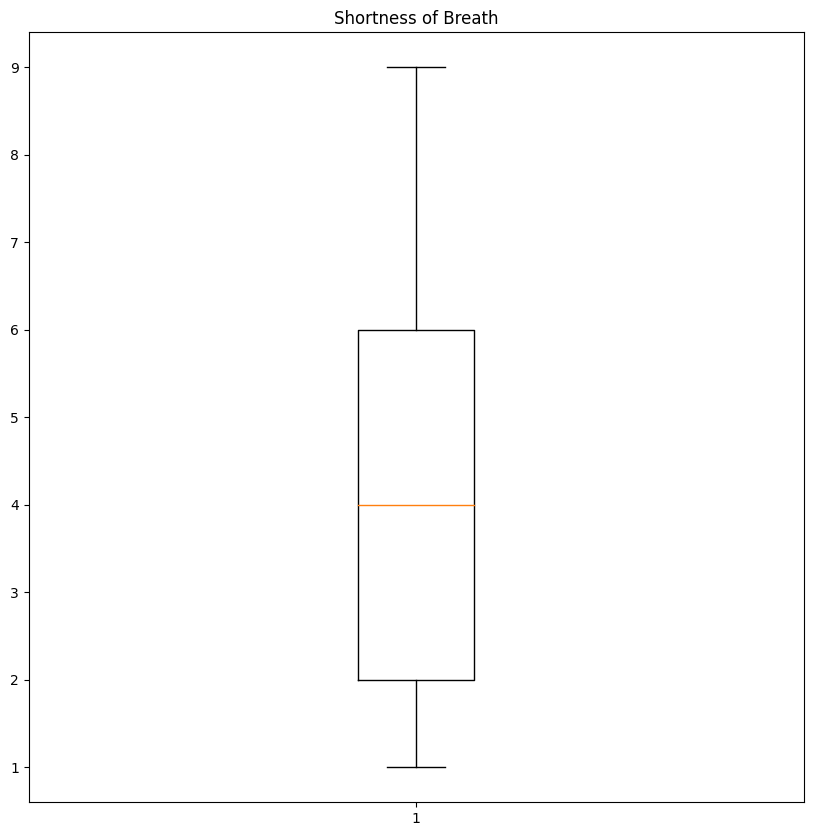

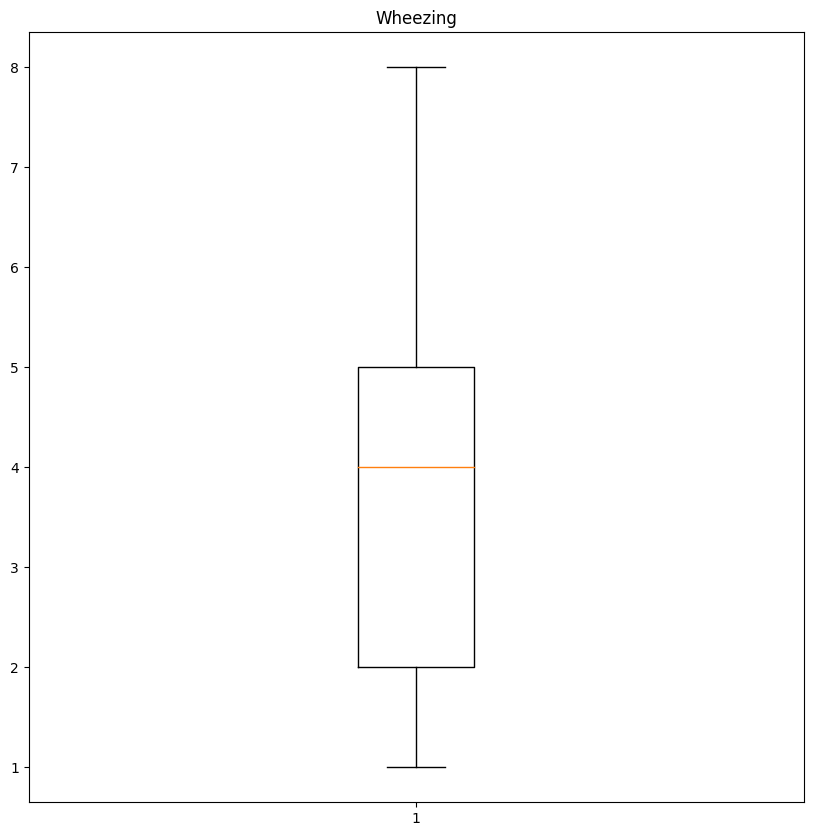

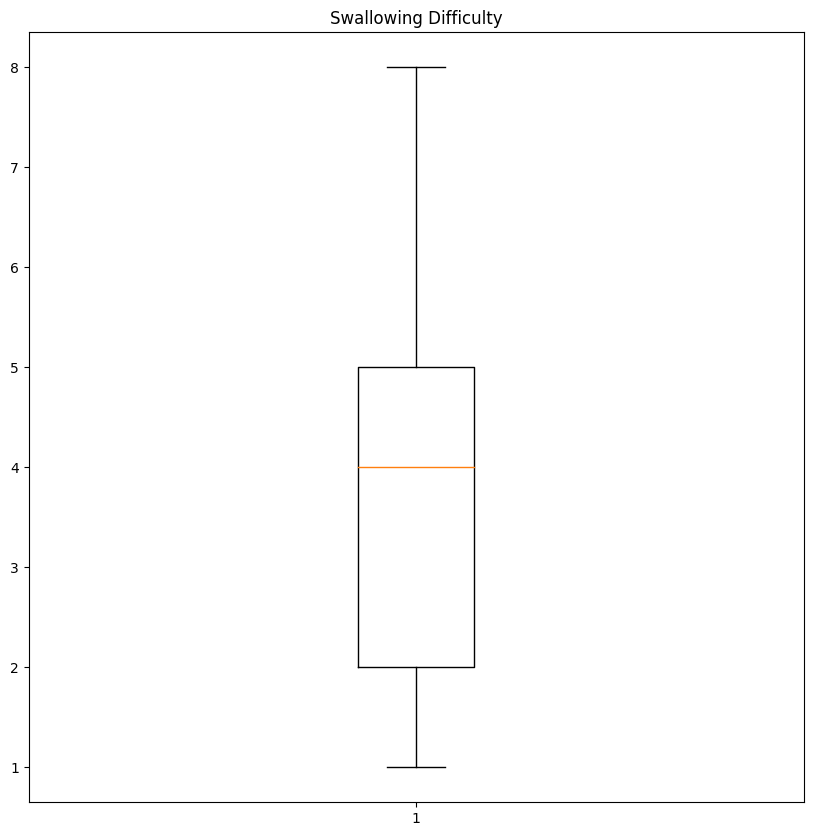

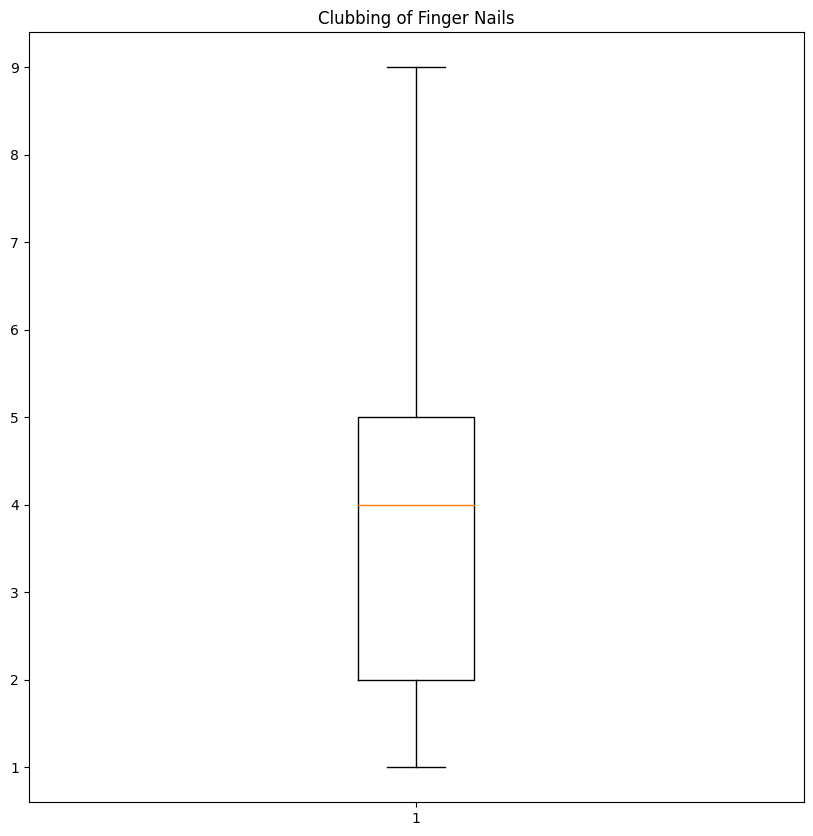

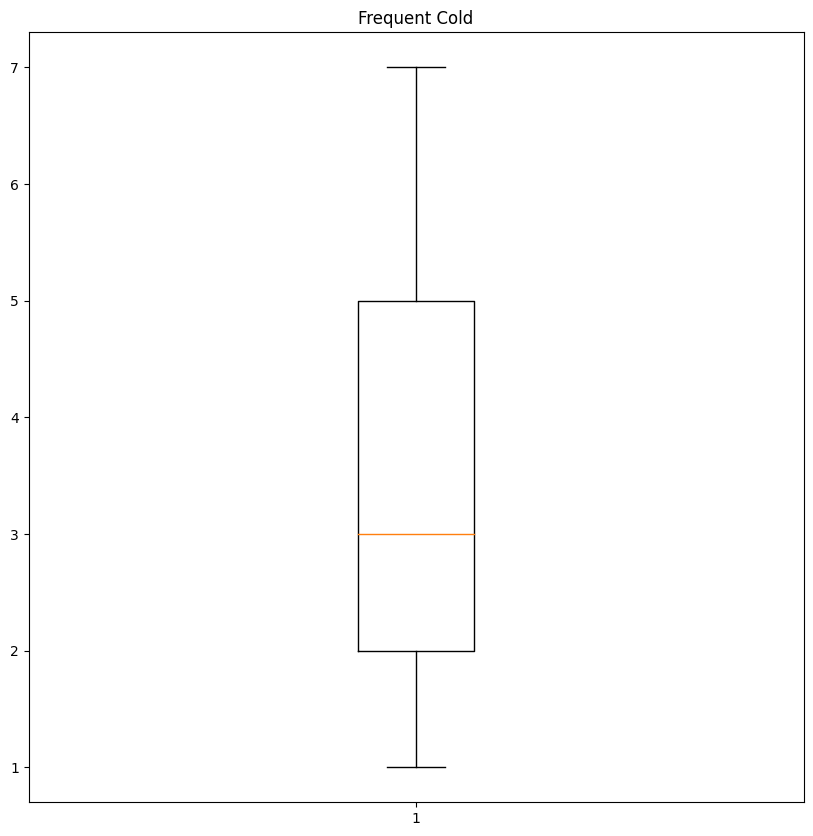

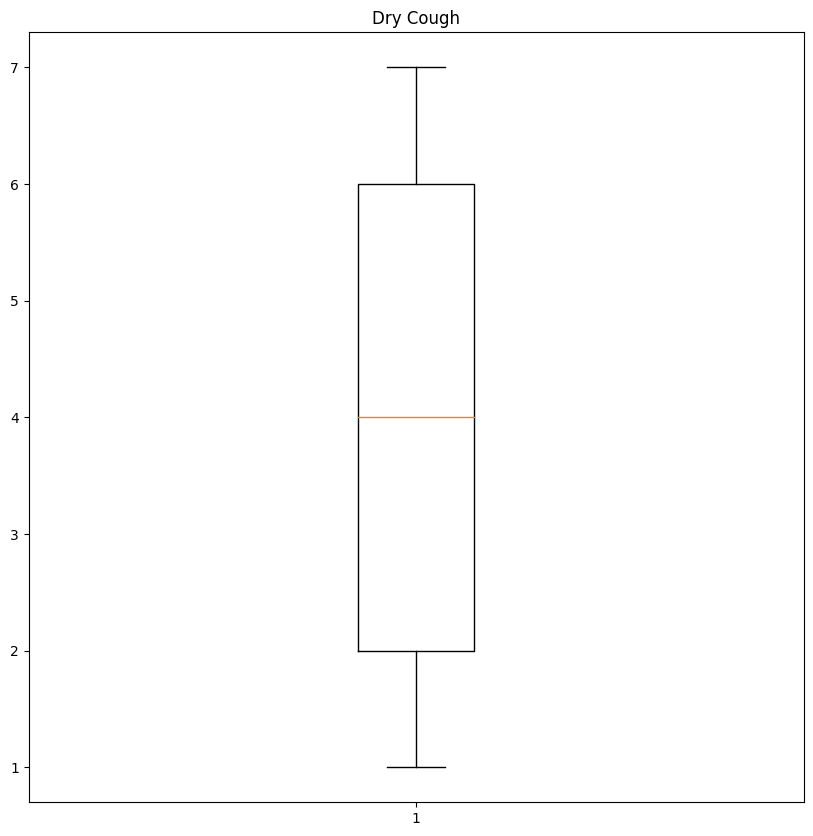

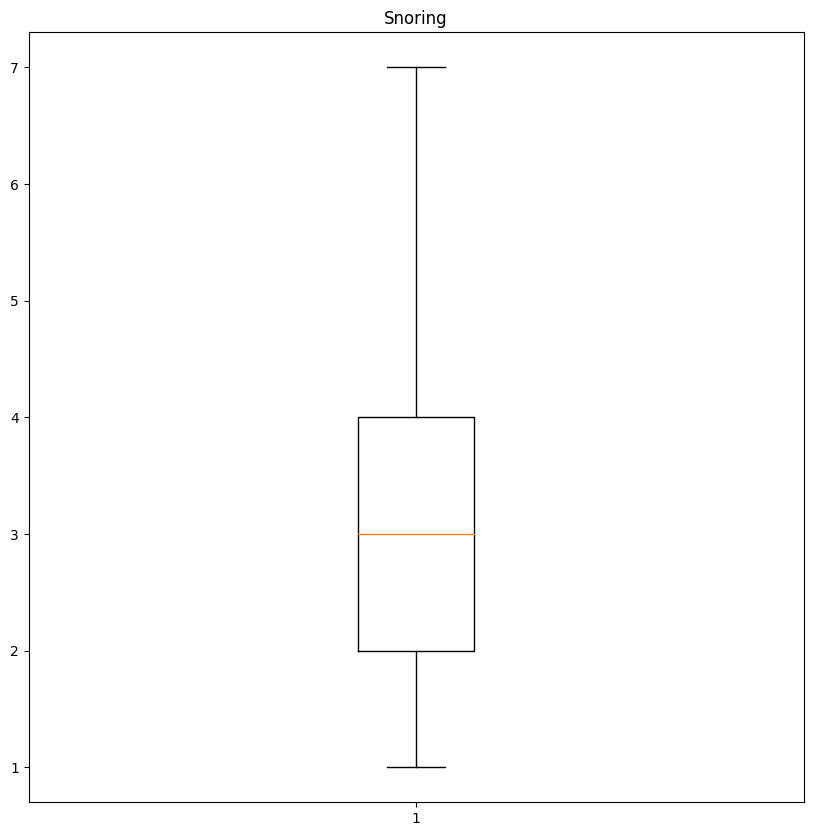

In [ ]:
for column in numeric_col:
  plt.figure(figsize=(10,10))
  plt.boxplot(data[column])
  plt.title(column)
  plt.show()

#Creating model without blancing data

In [ ]:
new_data=data.drop(["Patient Id","index","Level"],axis=1)
new_data["chronic Lung Disease"].value_counts()

6    308
2    173
4    141
3    141
7    107
5     80
1     50
Name: chronic Lung Disease, dtype: int64

In [ ]:
X = new_data.drop('chronic Lung Disease', axis=1)
y = new_data['chronic Lung Disease']
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=143)

# Check the shapes of the resulting dataframes to ensure correct splitting
class_model = svm.SVC()
class_model.fit(X_train ,y_train )
pred=class_model.predict(X_test)
accuracy_score(pred , y_test)*100

80.0

In [ ]:
max_count = new_data['chronic Lung Disease'].value_counts().max()
max_count

308

#After balancing our data

In [ ]:
grouped_df = new_data.groupby('chronic Lung Disease')
balanced_df = grouped_df.apply(lambda x: x.sample(max_count, replace=True)).reset_index(drop=True)
balanced_df

,Age,Gender,Air Pollution,Alcohol use,Dust Allergy,OccuPational Hazards,Genetic Risk,chronic Lung Disease,Balanced Diet,Obesity,...,Coughing of Blood,Fatigue,Weight Loss,Shortness of Breath,Wheezing,Swallowing Difficulty,Clubbing of Finger Nails,Frequent Cold,Dry Cough,Snoring
0,61,1,2,3,4,2,1,1,2,4,...,5,2,1,3,2,1,3,2,1,2
1,44,2,3,2,2,1,1,1,1,1,...,6,2,1,2,3,4,2,1,1,1
2,18,2,3,2,1,3,2,1,3,2,...,2,2,2,1,3,4,4,1,4,1
3,35,2,2,1,2,1,2,1,2,3,...,1,3,4,5,1,3,2,1,2,2
4,24,2,3,2,2,1,1,1,1,1,...,6,2,1,2,3,4,2,1,1,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2151,36,1,6,7,7,7,7,7,6,7,...,7,8,5,7,6,7,8,7,6,2
2152,36,1,6,7,7,7,6,7,7,7,...,8,4,2,3,1,4,5,6,7,5
2153,33,1,6,7,7,7,7,7,6,7,...,7,8,5,7,6,7,8,7,6,2
2154,28,1,6,7,8,7,6,7,7,2,...,8,2,3,6,4,2,3,1,2,1


In [ ]:
balanced_df['chronic Lung Disease'].value_counts()

1    308
2    308
3    308
4    308
5    308
6    308
7    308
Name: chronic Lung Disease, dtype: int64

In [ ]:
# Separate features (X) and target variable (y)


In [ ]:

X = balanced_df.drop('chronic Lung Disease', axis=1)
y = balanced_df['chronic Lung Disease']
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.4, random_state=1432)
class_model = svm.SVC()
class_model.fit(X_train ,y_train )
pred=class_model.predict(X_test)
accuracy_score(pred , y_test)*100



92.58400926998841

In [ ]:
one_hot_encoded = pd.get_dummies(balanced_df['chronic Lung Disease'])
df_one_hot = pd.concat([balanced_df, one_hot_encoded], axis=1)
df_one_hot


,Age,Gender,Air Pollution,Alcohol use,Dust Allergy,OccuPational Hazards,Genetic Risk,chronic Lung Disease,Balanced Diet,Obesity,...,Frequent Cold,Dry Cough,Snoring,1,2,3,4,5,6,7
0,61,1,2,3,4,2,1,1,2,4,...,2,1,2,1,0,0,0,0,0,0
1,44,2,3,2,2,1,1,1,1,1,...,1,1,1,1,0,0,0,0,0,0
2,18,2,3,2,1,3,2,1,3,2,...,1,4,1,1,0,0,0,0,0,0
3,35,2,2,1,2,1,2,1,2,3,...,1,2,2,1,0,0,0,0,0,0
4,24,2,3,2,2,1,1,1,1,1,...,1,1,1,1,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2151,36,1,6,7,7,7,7,7,6,7,...,7,6,2,0,0,0,0,0,0,1
2152,36,1,6,7,7,7,6,7,7,7,...,6,7,5,0,0,0,0,0,0,1
2153,33,1,6,7,7,7,7,7,6,7,...,7,6,2,0,0,0,0,0,0,1
2154,28,1,6,7,8,7,6,7,7,2,...,1,2,1,0,0,0,0,0,0,1


In [ ]:
one_hot_encoded

,1,2,3,4,5,6,7
0,1,0,0,0,0,0,0
1,1,0,0,0,0,0,0
2,1,0,0,0,0,0,0
3,1,0,0,0,0,0,0
4,1,0,0,0,0,0,0
...,...,...,...,...,...,...,...
2151,0,0,0,0,0,0,1
2152,0,0,0,0,0,0,1
2153,0,0,0,0,0,0,1
2154,0,0,0,0,0,0,1


In [ ]:
from sklearn.preprocessing import LabelEncoder

label_encoder = LabelEncoder()
balanced_df['chronic Lung Disease encoded version'] = label_encoder.fit_transform(balanced_df['chronic Lung Disease'])
balanced_df

,Age,Gender,Air Pollution,Alcohol use,Dust Allergy,OccuPational Hazards,Genetic Risk,chronic Lung Disease,Balanced Diet,Obesity,...,Fatigue,Weight Loss,Shortness of Breath,Wheezing,Swallowing Difficulty,Clubbing of Finger Nails,Frequent Cold,Dry Cough,Snoring,chronic Lung Disease encoded version
0,61,1,2,3,4,2,1,1,2,4,...,2,1,3,2,1,3,2,1,2,0
1,44,2,3,2,2,1,1,1,1,1,...,2,1,2,3,4,2,1,1,1,0
2,18,2,3,2,1,3,2,1,3,2,...,2,2,1,3,4,4,1,4,1,0
3,35,2,2,1,2,1,2,1,2,3,...,3,4,5,1,3,2,1,2,2,0
4,24,2,3,2,2,1,1,1,1,1,...,2,1,2,3,4,2,1,1,1,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2151,36,1,6,7,7,7,7,7,6,7,...,8,5,7,6,7,8,7,6,2,6
2152,36,1,6,7,7,7,6,7,7,7,...,4,2,3,1,4,5,6,7,5,6
2153,33,1,6,7,7,7,7,7,6,7,...,8,5,7,6,7,8,7,6,2,6
2154,28,1,6,7,8,7,6,7,7,2,...,2,3,6,4,2,3,1,2,1,6


# Tirth's Work

In [ ]:
new_data = data.drop(["Patient Id","index"],axis=1)
new_data["Level"].value_counts()

High      365
Medium    332
Low       303
Name: Level, dtype: int64

In [ ]:
from sklearn.preprocessing import LabelEncoder

endocer = LabelEncoder()

endoded_coloum = endocer.fit_transform(new_data["Level"])

new_data["Level_encoded"] = endoded_coloum

In [ ]:
X = new_data.drop(['Level' , 'Level_encoded' ] , axis = 1)
y = new_data['Level_encoded']

In [ ]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=143)

In [ ]:
model = svm.SVC()
model.fit(X_train ,y_train)

SVC()

In [ ]:
pred = model.predict(X_test)

In [ ]:
accuracy_score(pred , y_test)

0.98

In [ ]:
from sklearn.metrics import confusion_matrix, classification_report

cm = confusion_matrix(pred , y_test)
cm

array([[79,  0,  2],
       [ 0, 56,  0],
       [ 0,  2, 61]])

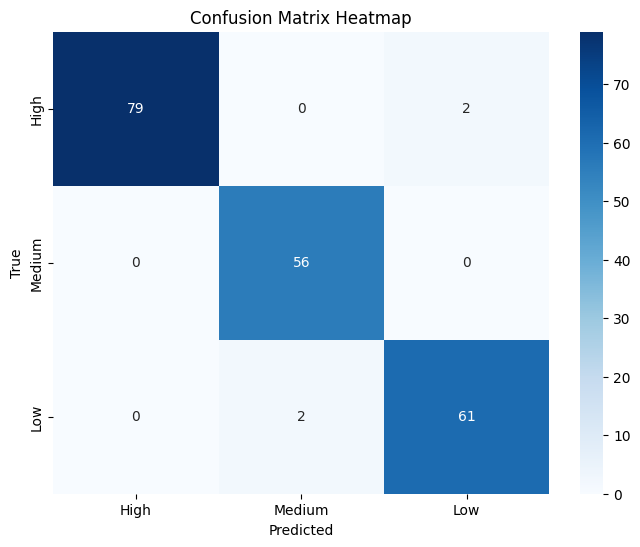

In [ ]:
target_names = ['High' , 'Medium' , 'Low']
plt.figure(figsize=(8, 6))
sns.heatmap(cm, annot=True, fmt="d", cmap="Blues", xticklabels=target_names, yticklabels=target_names)
plt.xlabel('Predicted')
plt.ylabel('True')
plt.title('Confusion Matrix Heatmap')
plt.show()

In [ ]:
print(classification_report(pred , y_test))

              precision    recall  f1-score   support

           0       1.00      0.98      0.99        81
           1       0.97      1.00      0.98        56
           2       0.97      0.97      0.97        63

    accuracy                           0.98       200
   macro avg       0.98      0.98      0.98       200
weighted avg       0.98      0.98      0.98       200

